<a href="https://colab.research.google.com/github/ManavD522/ManavD522/blob/master/Scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!touch imr_mapping/__init__.py
!touch imr_mapping/core/__init__.py
!touch imr_mapping/tests/__init__.py


touch: cannot touch 'imr_mapping/__init__.py': No such file or directory
touch: cannot touch 'imr_mapping/core/__init__.py': No such file or directory
touch: cannot touch 'imr_mapping/tests/__init__.py': No such file or directory


In [2]:
import sys
sys.path.append('/content')


In [3]:
!mkdir -p imr_mapping/core
!mkdir -p imr_mapping/tests
!mkdir -p imr_mapping/visuals


In [4]:
%%writefile imr_mapping/core/occupancy_grid.py
class OccupancyGrid:
    def __init__(self, grid_size=100, resolution=0.1):
        """
        grid_size : number of cells per side
        resolution : meters per cell
        """
        self.grid_size = grid_size
        self.resolution = resolution
        self.grid = [[0 for _ in range(grid_size)] for _ in range(grid_size)]

        # Robot starts at grid center
        self.origin = grid_size // 2

    def world_to_grid(self, x, y):
        """Convert world coordinates (m) to grid indices"""
        gx = int(x / self.resolution) + self.origin
        gy = int(y / self.resolution) + self.origin
        return gx, gy

    def mark_occupied(self, x, y):
        gx, gy = self.world_to_grid(x, y)
        if 0 <= gx < self.grid_size and 0 <= gy < self.grid_size:
            self.grid[gy][gx] = 1  # occupied

    def mark_free(self, x, y):
        gx, gy = self.world_to_grid(x, y)
        if 0 <= gx < self.grid_size and 0 <= gy < self.grid_size:
            self.grid[gy][gx] = -1  # free / explored

    def mark_free_path(self, r_x, r_y, o_x, o_y):
        """
        Marks cells along the path from robot (r_x, r_y) to obstacle (o_x, o_y) as free (-1).
        Uses a simplified Bresenham-like algorithm to draw a line.
        """
        gx0, gy0 = self.world_to_grid(r_x, r_y)
        gx1, gy1 = self.world_to_grid(o_x, o_y)

        dx = abs(gx1 - gx0)
        dy = abs(gy1 - gy0)
        sx = 1 if gx0 < gx1 else -1
        sy = 1 if gy0 < gy1 else -1
        err = dx - dy

        x, y = gx0, gy0

        while True:
            if 0 <= x < self.grid_size and 0 <= y < self.grid_size:
                self.grid[y][x] = -1 # Mark as free

            if x == gx1 and y == gy1:
                break

            e2 = 2 * err
            if e2 > -dy:
                err -= dy
                x += sx
            if e2 < dx:
                err += dx
                y += sy

    def get_grid(self):
        return self.grid

Writing imr_mapping/core/occupancy_grid.py


In [5]:
%%writefile imr_mapping/core/coordinate_transform.py
import math

def local_to_world(robot_x, robot_y, robot_theta, distance, angle_offset=0):
    """
    Convert sonar reading (distance) from robot frame to world coordinates

    robot_x, robot_y, robot_theta: robot pose in world
    distance: sonar distance measurement
    angle_offset: sonar orientation relative to robot heading
    """
    global_angle = robot_theta + angle_offset
    world_x = robot_x + distance * math.cos(global_angle)
    world_y = robot_y + distance * math.sin(global_angle)
    return world_x, world_y


Writing imr_mapping/core/coordinate_transform.py


In [6]:
%%writefile /content/imr_mapping/tests/fake_sonar_test.py
import math
from imr_mapping.core.occupancy_grid import OccupancyGrid
from imr_mapping.core.coordinate_transform import local_to_world

fake_sonar_readings = [0.5, 0.6, 0.55, 0.7, 0.65]
fake_robot_poses = [
    (0,0,0),
    (0,0,math.pi/4),
    (0,0,math.pi/2),
    (0,0,3*math.pi/4),
    (0,0,math.pi),
]

grid = OccupancyGrid(grid_size=100, resolution=0.05)

coords = []
for (x,y,theta), sonar in zip(fake_robot_poses, fake_sonar_readings):
    wx, wy = local_to_world(x, y, theta, sonar)
    coords.append((wx, wy))
    grid.mark_occupied(wx, wy)

# ---------------------------
# 🔥 PRINTING 0s and 1s
# ---------------------------
center = grid.grid_size // 2

print("\n=== FULL VISUAL GRID (20x20 around robot) ===")
for r in range(center-10, center+10):
    row = grid.get_grid()[r][center-10:center+10]
    print(" ".join([str(c) for c in row]))

print("\nLegend: 1 = Occupied • 0 = Unknown Area")
print("Robot position = roughly center of the grid area\n")


Writing /content/imr_mapping/tests/fake_sonar_test.py


In [7]:
%cd /content

import sys
if '/content' not in sys.path:
    sys.path.append('/content')


!touch /content/imr_mapping/__init__.py
!touch /content/imr_mapping/core/__init__.py
!touch /content/imr_mapping/tests/__init__.py


from imr_mapping.core.occupancy_grid import OccupancyGrid
print("Import successful!")


!python /content/imr_mapping/tests/fake_sonar_test.py


/content
Import successful!
Traceback (most recent call last):
  File "/content/imr_mapping/tests/fake_sonar_test.py", line 2, in <module>
    from imr_mapping.core.occupancy_grid import OccupancyGrid
ModuleNotFoundError: No module named 'imr_mapping'


In [8]:
%run /content/imr_mapping/tests/fake_sonar_test.py



=== FULL VISUAL GRID (20x20 around robot) ===
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Legend: 1 = Occupied • 0 = Unknown Area
Robot position = roughly center of the grid area



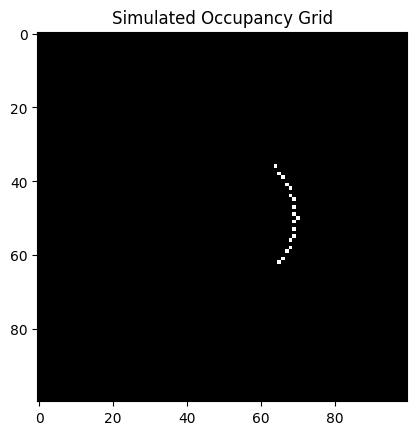

In [9]:
import matplotlib.pyplot as plt
from imr_mapping.core.occupancy_grid import OccupancyGrid
from imr_mapping.core.coordinate_transform import local_to_world
import math

# Re-create small map
grid = OccupancyGrid(grid_size=100, resolution=0.05)

# Simulate a wall in front of robot
for deg in range(-45, 45, 5):
    theta = math.radians(deg)
    wx, wy = local_to_world(0, 0, 0, 1.0, theta)
    grid.mark_occupied(wx, wy)

# Plot the occupancy grid
data = grid.get_grid()
plt.imshow(data, cmap='gray')
plt.title("Simulated Occupancy Grid")
plt.show()


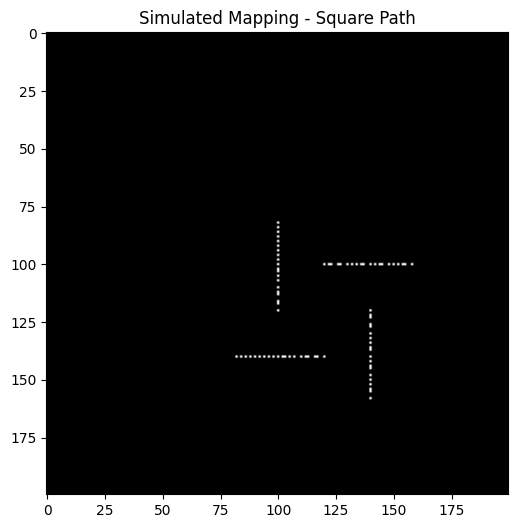

In [10]:
import math
import matplotlib.pyplot as plt
from imr_mapping.core.occupancy_grid import OccupancyGrid
from imr_mapping.core.coordinate_transform import local_to_world

# CONFIGURATION
RESOLUTION = 0.05
GRID_SIZE = 200
SONAR_RANGE = 3.0

grid = OccupancyGrid(grid_size=GRID_SIZE, resolution=RESOLUTION)

# Simulated robot path (a square)
robot_path = [
    (i * 0.1, 0, 0) for i in range(20)
] + [
    (2, i * 0.1, math.pi/2) for i in range(20)
] + [
    (2 - i * 0.1, 2, math.pi) for i in range(20)
] + [
    (0, 2 - i * 0.1, -math.pi/2) for i in range(20)
]

# Simulate sonar hitting a wall 1m ahead in direction robot faces
for (x, y, theta) in robot_path:
    wx, wy = local_to_world(x, y, theta, 1.0)  # 1m ahead
    grid.mark_occupied(wx, wy)

# VISUALIZE RESULT
data = grid.get_grid()
plt.figure(figsize=(6,6))
plt.imshow(data, cmap='gray')
plt.title("Simulated Mapping - Square Path")
plt.show()


In [11]:
%%writefile /content/imr_mapping/core/sonar_model.py
import math

# Three sonar orientations relative to robot heading
SONAR_ANGLES = {
    "left": math.radians(30),
    "center": 0,
    "right": math.radians(-30)
}

def sonar_hits(robot_x, robot_y, robot_theta, distance):
    """
    Returns world coordinates for left, center, right sonar beams.
    """
    from imr_mapping.core.coordinate_transform import local_to_world
    hits = {}
    for name, angle in SONAR_ANGLES.items():
        hits[name] = local_to_world(robot_x, robot_y, robot_theta, distance, angle)
    return hits


Writing /content/imr_mapping/core/sonar_model.py


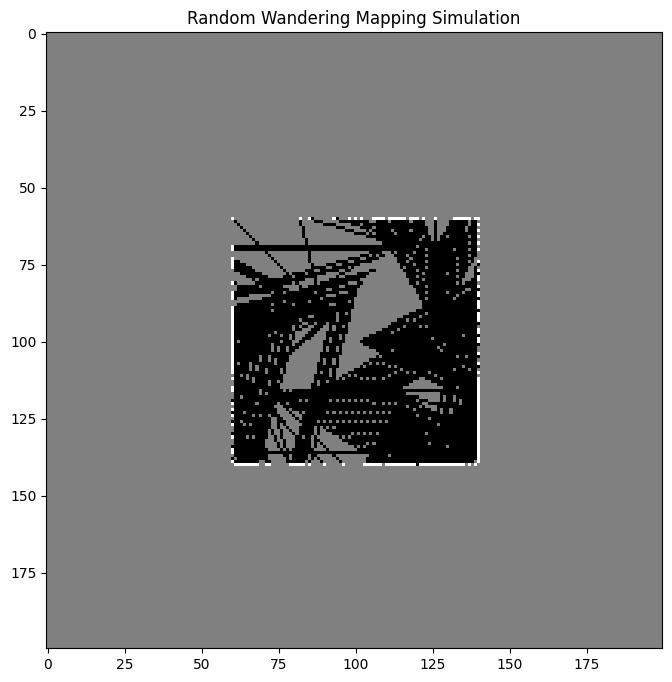

In [16]:
import random
import matplotlib.pyplot as plt
import numpy as np
from imr_mapping.core.occupancy_grid import OccupancyGrid
from imr_mapping.core.sonar_model import sonar_hits, SONAR_ANGLES
import math

GRID_SIZE = 200
RESOLUTION = 0.05
SONAR_RANGE = 1.5   # assume wall detected 1.5m away consistently

grid = OccupancyGrid(GRID_SIZE, RESOLUTION)

# Initial robot position
x, y, theta = 0, 0, 0

# Motion config
steps = 150
step_size = 0.1
turn_angle = math.radians(45)
WALL_THRESHOLD = 0.3  # distance to wall at which robot reacts

# 🔥 Simulated room (a box around the robot)
def room_wall_hit(x, y, theta, max_range=3.0):
    """
    Simulates sonar hitting a square room boundary.
    If a ray points outside, it returns the wall intersection point.
    """
    # Room boundaries in meters (world coordinates)
    min_bound, max_bound = -2.0, 2.0

    # Try sonar distance steps until we hit a wall
    step = 0.05
    dist = 0
    while dist < max_range:
        dist += step
        wx = x + dist * math.cos(theta)
        wy = y + dist * math.sin(theta)
        if wx <= min_bound or wx >= max_bound or wy <= min_bound or wy >= max_bound:
            return wx, wy
    return None


for _ in range(steps):
    # Check front sonar for possible collision
    front_hit = room_wall_hit(x, y, theta)
    if front_hit is not None:
        # If wall is too close, turn away
        hx, hy = front_hit
        dist = math.hypot(hx - x, hy - y)
        if dist < WALL_THRESHOLD:
            theta += random.choice([turn_angle, -turn_angle])
            continue  # do not move forward, just turn

    # Random small turns
    if random.random() < 0.2:
        theta += random.choice([turn_angle, -turn_angle])

    # Move forward
    x += step_size * math.cos(theta)
    y += step_size * math.sin(theta)

    # Sonar wall detections
    for name, angle in SONAR_ANGLES.items():
        hit = room_wall_hit(x, y, theta + angle)
        if hit:
            hx, hy = hit
            grid.mark_free_path(x, y, hx, hy)
            grid.mark_occupied(hx, hy)



# Plot result
plt.figure(figsize=(8,8))
plt.imshow(grid.get_grid(), cmap='gray')
plt.title("Random Wandering Mapping Simulation")
plt.show()

## ^Above Image will be used in Report under Testing and Results